In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
from sqlalchemy import create_engine, inspect, func

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
# Retreive the moste recent date
dates = session.query(measurement.date).order_by(measurement.date.desc()).first()
# Convert query to string
dates = dates[0]
# Convert string to datetime
first_date =dt.datetime.strptime(dates, '%Y-%m-%d')

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

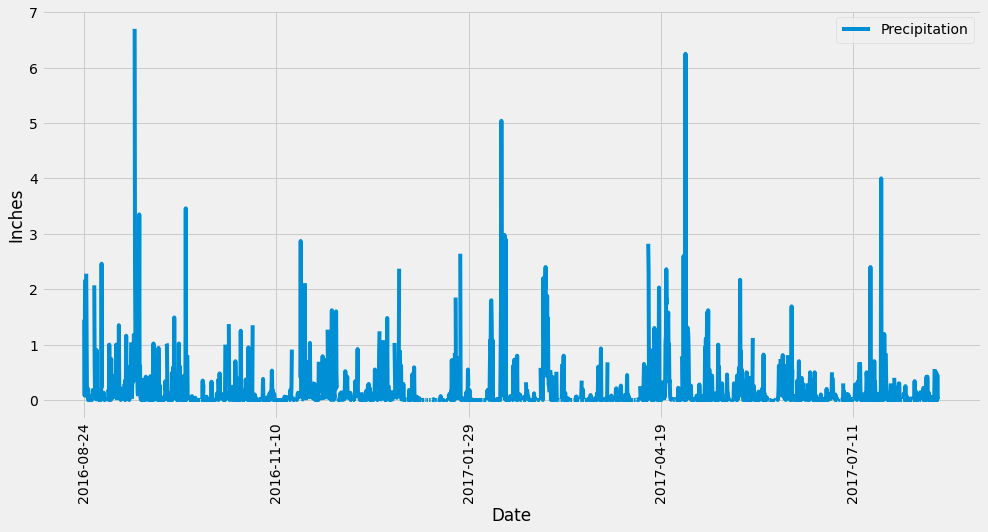

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# Set variable to 365 days previous to date retrieved using query
start_date= first_date -dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= start_date).\
    order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df=pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True, )
precip_df

# Sort the dataframe by date
precip_df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(15,7)).set(ylabel='Inches')
plt.xticks(rotation='vertical')


In [100]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [70]:
# Design a query to calculate the total number stations in the dataset
# Query returns a list of of unique stations
num_stations=list(session.query(measurement.station).distinct())
# len function returns the length of the list
len(num_stations)

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

# Query returns measurment station, counts the instances of each station then groups the return by station and
# orders them in descending value
station_activity=session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Sets a variable to the first station from station activity 
# then runs it through 3 querys to determine the requested temperatures
most_active = station_activity [0][0]
most_active_low= session.query(func.min(measurement.tobs)).filter_by(station=most_active).all()
most_active_high= session.query(func.max(measurement.tobs)).filter_by(station=most_active).all()
most_active_avg= session.query(func.avg(measurement.tobs)).filter_by(station=most_active).all()
print(f"Low = {most_active_low[0][0]}, High = {most_active_high[0][0]}, Average = {most_active_avg[0][0]}")

Low = 54.0, High = 85.0, Average = 71.66378066378067


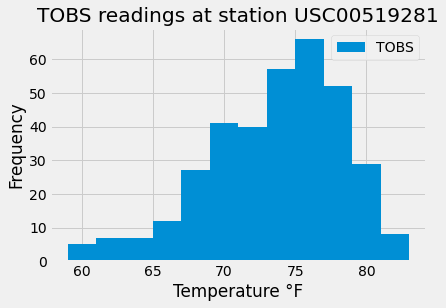

In [126]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data=[]
most_active_12=session.query(measurement.tobs).\
    filter(measurement.date >= start_date).\
    filter_by(station=most_active).all()
for row in most_active_12:
    data.append(int(row[0]))
plt.hist(data, bins=12, label="TOBS")
plt.title(f"TOBS readings at station {most_active}")
plt.xlabel("Temperature °F")
plt.ylabel("Frequency")
plt.legend()

# Close session

In [ ]:
# Close Session
session.close()